# Model Construction

In [1]:
import pandas as pd
import numpy as np

### Use the data set with generated features as the input for model construction

In [108]:
df=pd.read_csv('play_df.csv',encoding='utf-8')

In [83]:
df.head()

,uid,label,win1,win2,win3,win4,win5,device,play_ratio,total_play_time,...,play_1d_ov_7d,play_1d_ov_14d,play_1d_ov_23d,play_3d_ov_7d,play_3d_ov_14d,play_3d_ov_23d,play_7d_ov_14d,play_7d_ov_23d,play_14d_ov_23d,days_since_last_play
0,168551323,1,15.0,38.0,90.0,164.0,291,ar,0.866174,1107.816667,...,0.166667,0.091463,0.051546,0.422222,0.231707,0.130584,0.548780,0.309278,0.563574,0
1,168542680,0,30.0,90.0,410.0,622.0,942,ar,0.623113,2373.466667,...,0.073171,0.048232,0.031847,0.219512,0.144695,0.095541,0.659164,0.435244,0.660297,0
2,168551542,1,0.0,0.0,0.0,0.0,90,ar,0.937525,351.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
3,168549948,1,0.0,0.0,0.0,0.0,551,ar,0.261726,595.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
4,168551120,1,0.0,0.0,0.0,24.0,90,ar,0.672008,250.566667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,11


In [84]:
df_feature=df.drop('uid',axis=1)
df_feature.head()

,label,win1,win2,win3,win4,win5,device,play_ratio,total_play_time,total_play_day,...,play_1d_ov_7d,play_1d_ov_14d,play_1d_ov_23d,play_3d_ov_7d,play_3d_ov_14d,play_3d_ov_23d,play_7d_ov_14d,play_7d_ov_23d,play_14d_ov_23d,days_since_last_play
0,1,15.0,38.0,90.0,164.0,291,ar,0.866174,1107.816667,20,...,0.166667,0.091463,0.051546,0.422222,0.231707,0.130584,0.548780,0.309278,0.563574,0
1,0,30.0,90.0,410.0,622.0,942,ar,0.623113,2373.466667,20,...,0.073171,0.048232,0.031847,0.219512,0.144695,0.095541,0.659164,0.435244,0.660297,0
2,1,0.0,0.0,0.0,0.0,90,ar,0.937525,351.083333,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
3,1,0.0,0.0,0.0,0.0,551,ar,0.261726,595.100000,5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
4,1,0.0,0.0,0.0,24.0,90,ar,0.672008,250.566667,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,11


In [85]:
df_feature.dtypes

label                     int64
win1                    float64
win2                    float64
win3                    float64
win4                    float64
win5                      int64
device                   object
play_ratio              float64
total_play_time         float64
total_play_day            int64
play_1d_ov_3d           float64
play_1d_ov_7d           float64
play_1d_ov_14d          float64
play_1d_ov_23d          float64
play_3d_ov_7d           float64
play_3d_ov_14d          float64
play_3d_ov_23d          float64
play_7d_ov_14d          float64
play_7d_ov_23d          float64
play_14d_ov_23d         float64
days_since_last_play      int64
dtype: object

In [86]:
# change label and device to categorical variable
df_feature.label=df_feature.label.astype('category')
df_feature.device=df_feature.device.astype('category')

In [87]:
df_feature.dtypes

label                   category
win1                     float64
win2                     float64
win3                     float64
win4                     float64
win5                       int64
device                  category
play_ratio               float64
total_play_time          float64
total_play_day             int64
play_1d_ov_3d            float64
play_1d_ov_7d            float64
play_1d_ov_14d           float64
play_1d_ov_23d           float64
play_3d_ov_7d            float64
play_3d_ov_14d           float64
play_3d_ov_23d           float64
play_7d_ov_14d           float64
play_7d_ov_23d           float64
play_14d_ov_23d          float64
days_since_last_play       int64
dtype: object

In [88]:
df_device=pd.get_dummies(df_feature['device'])
del df_feature['device']
df_feature.head()

,label,win1,win2,win3,win4,win5,play_ratio,total_play_time,total_play_day,play_1d_ov_3d,play_1d_ov_7d,play_1d_ov_14d,play_1d_ov_23d,play_3d_ov_7d,play_3d_ov_14d,play_3d_ov_23d,play_7d_ov_14d,play_7d_ov_23d,play_14d_ov_23d,days_since_last_play
0,1,15.0,38.0,90.0,164.0,291,0.866174,1107.816667,20,0.394737,0.166667,0.091463,0.051546,0.422222,0.231707,0.130584,0.548780,0.309278,0.563574,0
1,0,30.0,90.0,410.0,622.0,942,0.623113,2373.466667,20,0.333333,0.073171,0.048232,0.031847,0.219512,0.144695,0.095541,0.659164,0.435244,0.660297,0
2,1,0.0,0.0,0.0,0.0,90,0.937525,351.083333,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
3,1,0.0,0.0,0.0,0.0,551,0.261726,595.100000,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
4,1,0.0,0.0,0.0,24.0,90,0.672008,250.566667,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,11


In [89]:
df_matrix=df_feature.join(df_device)
df_matrix.head()

,label,win1,win2,win3,win4,win5,play_ratio,total_play_time,total_play_day,play_1d_ov_3d,...,play_1d_ov_23d,play_3d_ov_7d,play_3d_ov_14d,play_3d_ov_23d,play_7d_ov_14d,play_7d_ov_23d,play_14d_ov_23d,days_since_last_play,ar,ip
0,1,15.0,38.0,90.0,164.0,291,0.866174,1107.816667,20,0.394737,...,0.051546,0.422222,0.231707,0.130584,0.548780,0.309278,0.563574,0,1,0
1,0,30.0,90.0,410.0,622.0,942,0.623113,2373.466667,20,0.333333,...,0.031847,0.219512,0.144695,0.095541,0.659164,0.435244,0.660297,0,1,0
2,1,0.0,0.0,0.0,0.0,90,0.937525,351.083333,4,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17,1,0
3,1,0.0,0.0,0.0,0.0,551,0.261726,595.100000,5,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17,1,0
4,1,0.0,0.0,0.0,24.0,90,0.672008,250.566667,11,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,11,1,0


### Train/Test Split

In [90]:
from sklearn.cross_validation import train_test_split

In [91]:
y=np.array(df_matrix['label'])
del df_matrix['label']
x=np.array(df_matrix)

In [92]:
print('shape of x is:%s' % str(x.shape))
print('shape of y is:%s' % str(y.shape))

shape of x is:(25389, 21)
shape of y is:(25389,)


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [94]:
feature_names=df_matrix.columns.values
feature_names

array([u'win1', u'win2', u'win3', u'win4', u'win5', u'play_ratio',
       u'total_play_time', u'total_play_day', u'play_1d_ov_3d',
       u'play_1d_ov_7d', u'play_1d_ov_14d', u'play_1d_ov_23d',
       u'play_3d_ov_7d', u'play_3d_ov_14d', u'play_3d_ov_23d',
       u'play_7d_ov_14d', u'play_7d_ov_23d', u'play_14d_ov_23d',
       u'days_since_last_play', u'ar', u'ip'], dtype=object)

## Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV  
from sklearn import cross_validation

In [16]:
LogisticModel = LogisticRegression()
LogisticModel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
print('Training DataSet Score: %f' % LogisticModel.score(x_train, y_train))
print('Testing DataSet Score: %f' % LogisticModel.score(x_test, y_test))

Training DataSet Score: 0.747361
Testing DataSet Score: 0.751950


Use GridSearch method to find best parameters

In [18]:
LR_param = {
    "penalty": ["l1", "l2"],
    "C": [0.5,1,2,4,8,16],
    "tol": [0.001,0.0001,0.00001]
}
LR = LogisticRegression(n_jobs = 4)
LR_grid = GridSearchCV(LR, LR_param, cv=5)
LR_grid.fit(x_train, y_train)
print("Logistic Regression: Best parameters set found on development set:")  
print(LR_grid.best_params_)

Logistic Regression: Best parameters set found on development set:
{'penalty': 'l1', 'C': 1, 'tol': 0.0001}


In [19]:
LogisticModel = LogisticRegression(penalty = 'l1', C = 8, tol = 0.0001)
LogisticModel.fit(x_train, y_train)
print('Training DataSet Score: %f' % LogisticModel.score(x_train, y_train))
print('Testing DataSet Score: %f' % LogisticModel.score(x_test, y_test))

Training DataSet Score: 0.749252
Testing DataSet Score: 0.753525


In [20]:
def get_top_values(lst, n, labels):
    return [labels[i] for i in np.argsort(lst)[::-1][:n]] 

In [21]:
coeff = np.absolute(LogisticModel.coef_[0])
get_top_values(coeff, 5, feature_names)

[u'play_1d_ov_23d',
 u'play_1d_ov_14d',
 u'play_7d_ov_23d',
 u'ip',
 u'play_14d_ov_23d']

## Ramdom Forest Classifier

In [109]:
df=df.set_index('uid')

In [110]:
df.head()

,label,win1,win2,win3,win4,win5,device,play_ratio,total_play_time,total_play_day,...,play_1d_ov_7d,play_1d_ov_14d,play_1d_ov_23d,play_3d_ov_7d,play_3d_ov_14d,play_3d_ov_23d,play_7d_ov_14d,play_7d_ov_23d,play_14d_ov_23d,days_since_last_play
uid,,,,,,,,,,,,,,,,,,,,,
168551323,1,15.0,38.0,90.0,164.0,291,ar,0.866174,1107.816667,20,...,0.166667,0.091463,0.051546,0.422222,0.231707,0.130584,0.548780,0.309278,0.563574,0
168542680,0,30.0,90.0,410.0,622.0,942,ar,0.623113,2373.466667,20,...,0.073171,0.048232,0.031847,0.219512,0.144695,0.095541,0.659164,0.435244,0.660297,0
168551542,1,0.0,0.0,0.0,0.0,90,ar,0.937525,351.083333,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
168549948,1,0.0,0.0,0.0,0.0,551,ar,0.261726,595.100000,5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17
168551120,1,0.0,0.0,0.0,24.0,90,ar,0.672008,250.566667,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,11


In [111]:
df_dummies = pd.get_dummies(df,columns=['device'])

In [112]:
df_dummies = df_dummies.drop('label',axis=1)
df_dummies.head()

,win1,win2,win3,win4,win5,play_ratio,total_play_time,total_play_day,play_1d_ov_3d,play_1d_ov_7d,...,play_1d_ov_23d,play_3d_ov_7d,play_3d_ov_14d,play_3d_ov_23d,play_7d_ov_14d,play_7d_ov_23d,play_14d_ov_23d,days_since_last_play,device_ar,device_ip
uid,,,,,,,,,,,,,,,,,,,,,
168551323,15.0,38.0,90.0,164.0,291,0.866174,1107.816667,20,0.394737,0.166667,...,0.051546,0.422222,0.231707,0.130584,0.548780,0.309278,0.563574,0,1,0
168542680,30.0,90.0,410.0,622.0,942,0.623113,2373.466667,20,0.333333,0.073171,...,0.031847,0.219512,0.144695,0.095541,0.659164,0.435244,0.660297,0,1,0
168551542,0.0,0.0,0.0,0.0,90,0.937525,351.083333,4,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17,1,0
168549948,0.0,0.0,0.0,0.0,551,0.261726,595.100000,5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17,1,0
168551120,0.0,0.0,0.0,24.0,90,0.672008,250.566667,11,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,11,1,0


In [113]:
X = df_dummies.values
y = df.label.values

In [114]:
X.shape,y.shape

((25389, 21), (25389,))

In [115]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test.shape, y_test.shape

((7617, 21), (7617,))

In [116]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [117]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth=10, n_estimators=200, min_samples_leaf=20, criterion='entropy',
                                   min_samples_split=50, min_impurity_split=0.1, max_features = 'auto', n_jobs = -1)

model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=0.1, min_samples_leaf=20,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [118]:
model_rfc.score(X_train, y_train),model_rfc.score(X_test, y_test)

(0.78618050866531619, 0.76696862281738221)

In [119]:
roc_auc_score(y_test, model_rfc.predict(X_test))

0.7668516886748743

In [120]:
importance_coeff = model_rfc.feature_importances_
importance_coeff

array([ 0.01396588,  0.10597115,  0.07828558,  0.05311488,  0.03695771,
        0.02394982,  0.03865957,  0.07128166,  0.02245049,  0.01705811,
        0.01283354,  0.01883758,  0.07316095,  0.06177997,  0.10050997,
        0.05952689,  0.04216434,  0.03212261,  0.13075389,  0.00319949,
        0.00341591])

In [121]:
df_coeffs = pd.DataFrame(list(zip(df_dummies.columns, importance_coeff))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.iloc[-1:-15:-1,:]

,feature,coeff
18,days_since_last_play,0.130754
1,win2,0.105971
14,play_3d_ov_23d,0.100510
2,win3,0.078286
12,play_3d_ov_7d,0.073161
7,total_play_day,0.071282
13,play_3d_ov_14d,0.061780
15,play_7d_ov_14d,0.059527
3,win4,0.053115
16,play_7d_ov_23d,0.042164


In [125]:
def print_results_rf(y_true, y_pred):
    print("Accuracy of the Random Forest Classifier is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision of the Random Forest Classifier is: {}".format(precision_score(y_true, y_pred)))
    print("Recall of the Random Forest Classifier is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score of the Random Forest Classifier is: {}".format(f1_score(y_true, y_pred)))
    print("roc_auc_score of the Random Forest Classifier is: {}".format(roc_auc_score(y_true, y_pred)))

In [126]:
y_test_pred=model_rfc.predict(X_test)

In [127]:
print("Test set scores:")
print_results_rf(y_test, y_test_pred)

Test set scores:
Accuracy of the Random Forest Classifier is: 0.766968622817
Precision of the Random Forest Classifier is: 0.762522247648
Recall of the Random Forest Classifier is: 0.780989583333
f1-score of the Random Forest Classifier is: 0.771645439341
roc_auc_score of the Random Forest Classifier is: 0.766851688675


In [63]:
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

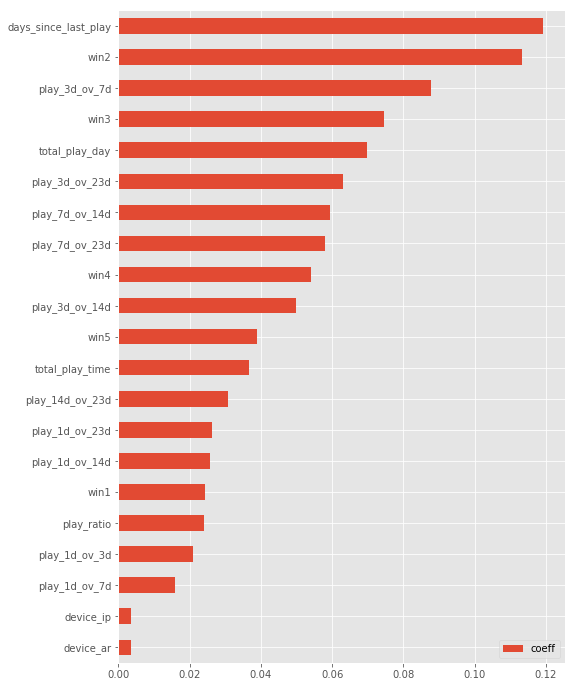

In [65]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.rcParams["figure.figsize"] = (10,12)
plt.show()

## Logistic Regression 

In [37]:
X_lr= df_dummies.values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty = 'l2',C= 1, n_jobs = -1)

In [40]:
accuracies = []
#accuracies.columns = ['regularization','Accuracy_score_train','Accuracy_score_test']
for c in [1e-3,1e-2,0.1,1,10,100,1000]:
    model_lr = LogisticRegression(penalty = 'l2',C= c, n_jobs = -1)
    model_lr.fit(X_train, y_train)
    accuracies.append([c,model_lr.score(X_train, y_train), model_lr.score(X_test, y_test)])
    
accuracies

[[0.001, 0.74549853702453295, 0.75725351188131806],
 [0.01, 0.74606121989646634, 0.75830379414467641],
 [0.1, 0.74617375647085304, 0.75974793225679405],
 [1, 0.74589241503488635, 0.7600105028226336],
 [10, 0.74611748818365964, 0.75790993829591702],
 [100, 0.74668017105559303, 0.75830379414467641],
 [1000, 0.74594868332207964, 0.75830379414467641]]

In [41]:
model_lr = LogisticRegression(penalty = 'l1',C= 0.1, n_jobs = -1)
model_lr.fit(X_train, y_train)
model_lr.score(X_train, y_train), model_lr.score(X_test, y_test)

(0.74679270762997974, 0.75909150584219509)

In [71]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [74]:
def print_results(y_true, y_pred):
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_true, y_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_true, y_pred)))
    print("roc_auc_score of the Logistic Regression is: {}".format(roc_auc_score(y_true, y_pred)))

In [75]:
y_test_pred=model_lr.predict(X_test)

In [107]:
print("Test set scores:")
print_results(y_test, y_test_pred)

Test set scores:
Accuracy of the Logistic Regression is: 0.759091505842
Precision of the Logistic Regression is: 0.778085991678
Recall of the Logistic Regression is: 0.73046875
f1-score of the Logistic Regression is: 0.753525856279
roc_auc_score of the Logistic Regression is: 0.759330218262


In [42]:
model_lr.coef_

array([[ -1.57180856e-03,  -2.86338966e-03,  -3.03652762e-03,
         -3.06844558e-04,   2.05057164e-04,   0.00000000e+00,
          1.64926796e-07,  -6.97468976e-02,  -2.04977041e-01,
          1.93925988e-01,   8.99137459e-03,   0.00000000e+00,
          0.00000000e+00,   1.33472753e-01,   0.00000000e+00,
          1.39480878e-01,  -1.27080955e-01,   0.00000000e+00,
          1.98474576e-01,   1.37872842e-01,  -2.70121953e-01]])

In [43]:
sum(abs(model_lr.coef_[0])>0.2)

2

In [44]:
columns = list(df_dummies.columns)
coeffs = model_lr.coef_[0]
df_coeffs = pd.DataFrame(list(zip(columns, coeffs))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.iloc[::-1,:]

,feature,coeff
18,days_since_last_play,1.984746e-01
9,play_1d_ov_7d,1.939260e-01
15,play_7d_ov_14d,1.394809e-01
19,device_ar,1.378728e-01
13,play_3d_ov_14d,1.334728e-01
10,play_1d_ov_14d,8.991375e-03
4,win5,2.050572e-04
6,total_play_time,1.649268e-07
17,play_14d_ov_23d,0.000000e+00
14,play_3d_ov_23d,0.000000e+00


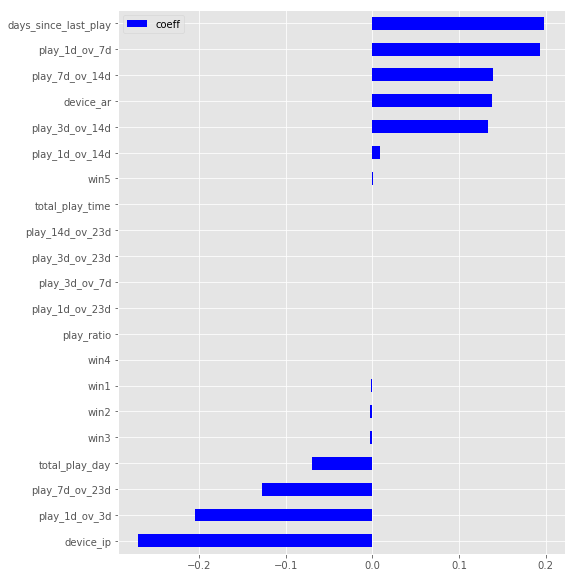

In [45]:
ax = df_coeffs.plot.barh(color = 'b')
t = np.arange(X_lr.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()